<a href="https://colab.research.google.com/github/SpringBoardMentor193s/SentinelNet_Oct_Batch/blob/Vishakha/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
    'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class', 'difficulty'
]

extracted_dir = "/content/nsl-kdd"
renamed_file_name = "KDDTrain+.txt"
file_path = os.path.join(extracted_dir, renamed_file_name)

if os.path.exists(file_path):
    print(f"Loading data from {file_path}...")
    train_df = pd.read_csv(file_path, header=None, names=column_names)
    train_df.drop(['difficulty'], axis=1, inplace=True)
    train_df['attack_binary'] = train_df['class'].apply(lambda x: 0 if x == 'normal' else 1)
    print("Data loaded successfully.")
else:
    print(f"Error: Data file not found at {file_path}. Please ensure the extraction process completed correctly.")

Loading data from /content/nsl-kdd/KDDTrain+.txt...
Data loaded successfully.


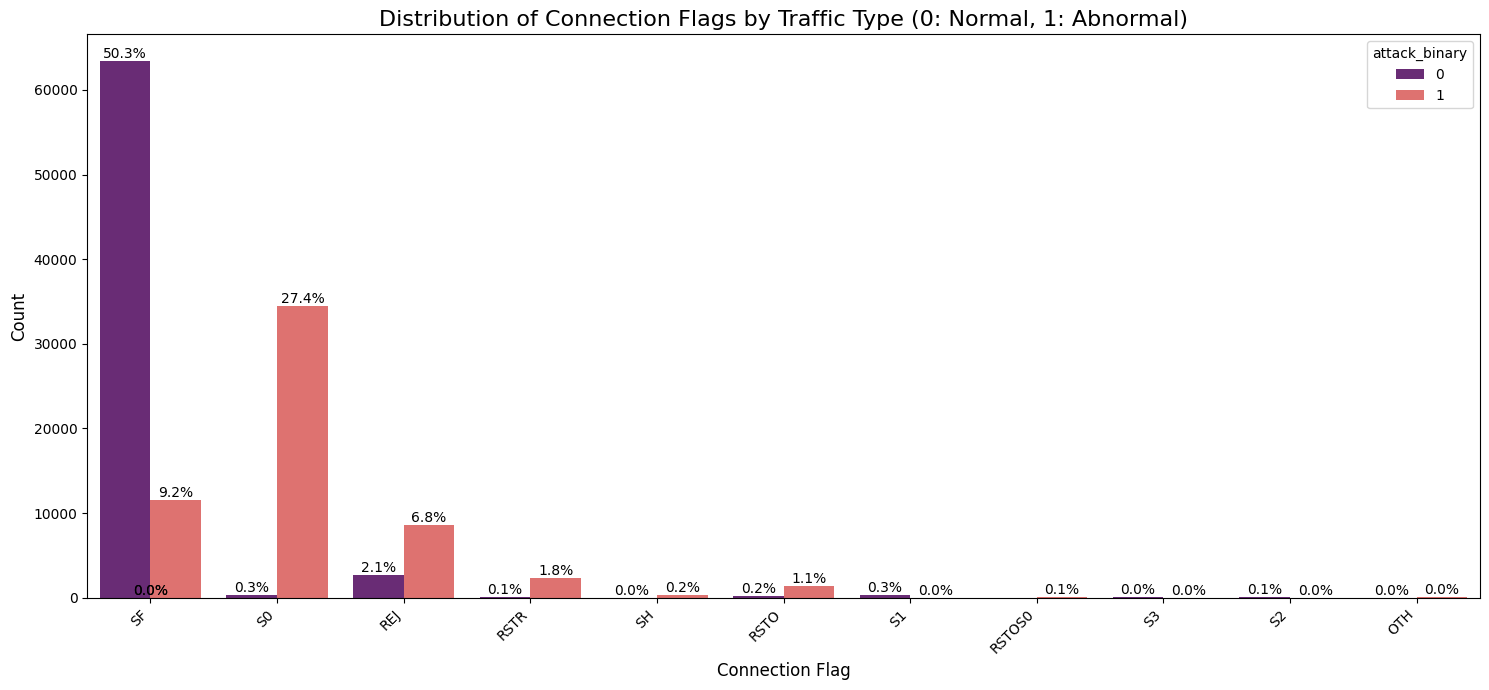

Percentage of Normal Traffic: 53.46%
Percentage of Abnormal (Attack) Traffic: 46.54%


In [ ]:
# Count plot for 'flag' with percentage annotations
plt.figure(figsize=(15, 7))
ax = sns.countplot(x='flag', hue='attack_binary', data=train_df, palette='magma')
plt.title('Distribution of Connection Flags by Traffic Type (0: Normal, 1: Abnormal)', fontsize=16)
plt.xlabel('Connection Flag', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

total = len(train_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

total_count = len(train_df)
normal_percentage = (train_df['attack_binary'].value_counts(normalize=True).get(0, 0)) * 100
attack_percentage = (train_df['attack_binary'].value_counts(normalize=True).get(1, 0)) * 100

print(f"Percentage of Normal Traffic: {normal_percentage:.2f}%")
print(f"Percentage of Abnormal (Attack) Traffic: {attack_percentage:.2f}%")

/tmp/ipython-input-695902700.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attack_binary', y='srv_serror_rate', data=train_df, palette='viridis')


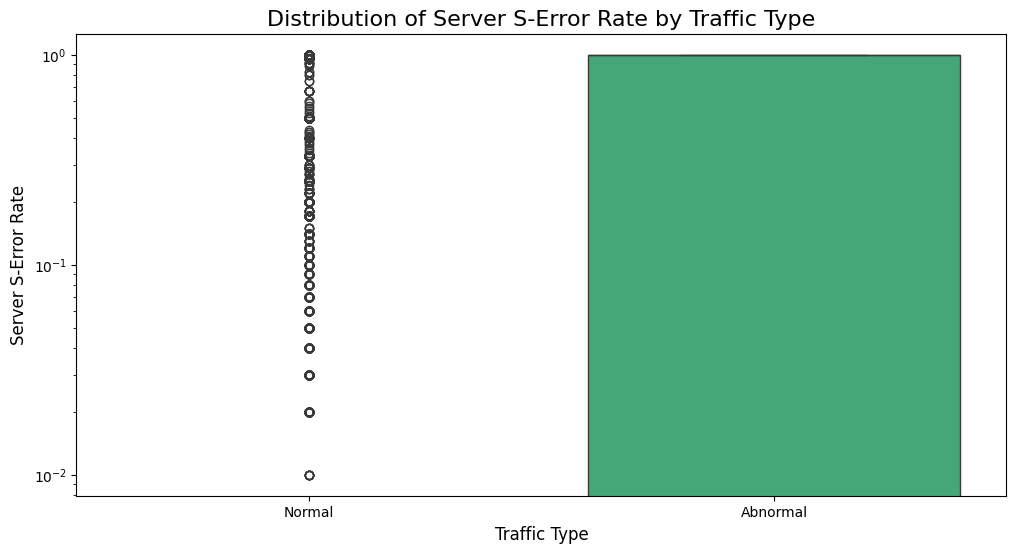

Percentage of Normal Traffic: 53.46%
Percentage of Abnormal (Attack) Traffic: 46.54%


In [ ]:
# Box plot for 'srv_serror_rate'
plt.figure(figsize=(12, 6))
sns.boxplot(x='attack_binary', y='srv_serror_rate', data=train_df, palette='viridis')
plt.title('Distribution of Server S-Error Rate by Traffic Type', fontsize=16)
plt.xlabel('Traffic Type', fontsize=12)
plt.ylabel('Server S-Error Rate', fontsize=12)
plt.xticks([0, 1], ['Normal', 'Abnormal'])
plt.yscale('log')
plt.show()

total_count = len(train_df)
normal_percentage = (train_df['attack_binary'].value_counts(normalize=True).get(0, 0)) * 100
attack_percentage = (train_df['attack_binary'].value_counts(normalize=True).get(1, 0)) * 100

print(f"Percentage of Normal Traffic: {normal_percentage:.2f}%")
print(f"Percentage of Abnormal (Attack) Traffic: {attack_percentage:.2f}%")

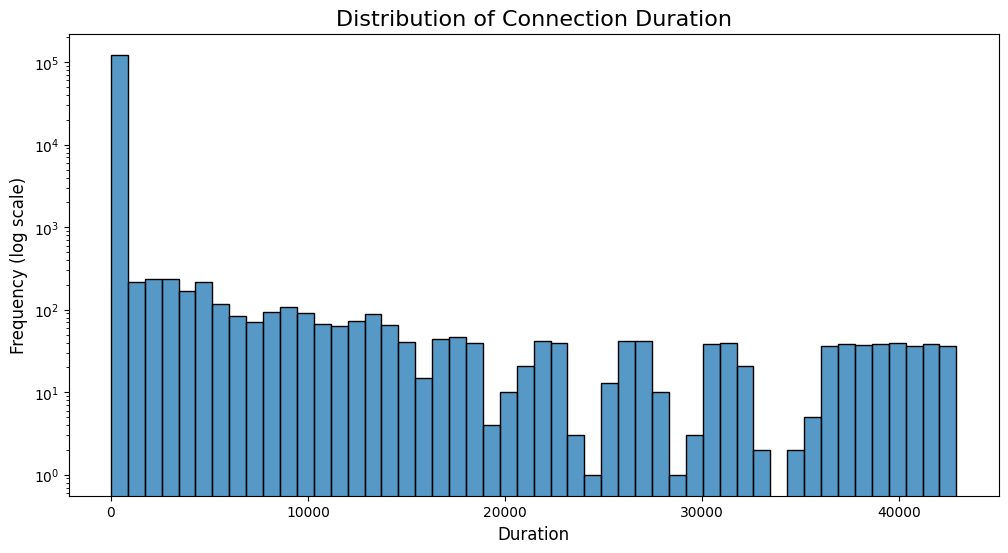

In [ ]:
# Histogram for the 'duration' feature
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='duration', bins=50, kde=False)
plt.title('Distribution of Connection Duration', fontsize=16)
plt.xlabel('Duration', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)
plt.yscale('log')
plt.show()

/tmp/ipython-input-3158621093.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='attack_binary',data=train_df, palette='pastel')


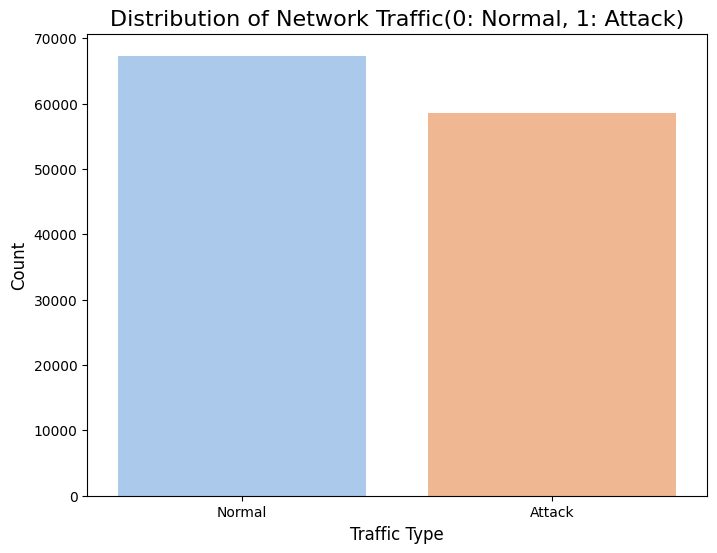

attack_binary
0    0.534583
1    0.465417
Name: proportion, dtype: float64


In [ ]:
train_df['attack_binary'] = train_df['class'].apply(lambda x: 0 if x == 'normal' else 1)
test_df['attack_binary'] = test_df['class'].apply(lambda x: 0 if x == 'normal' else 1)

plt.figure(figsize=(8,6))
sns.countplot(x='attack_binary',data=train_df, palette='pastel')
plt.title('Distribution of Network Traffic(0: Normal, 1: Attack)', fontsize=16)
plt.xlabel('Traffic Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0,1],['Normal','Attack'])
plt.show()
print(train_df['attack_binary'].value_counts(normalize=True))

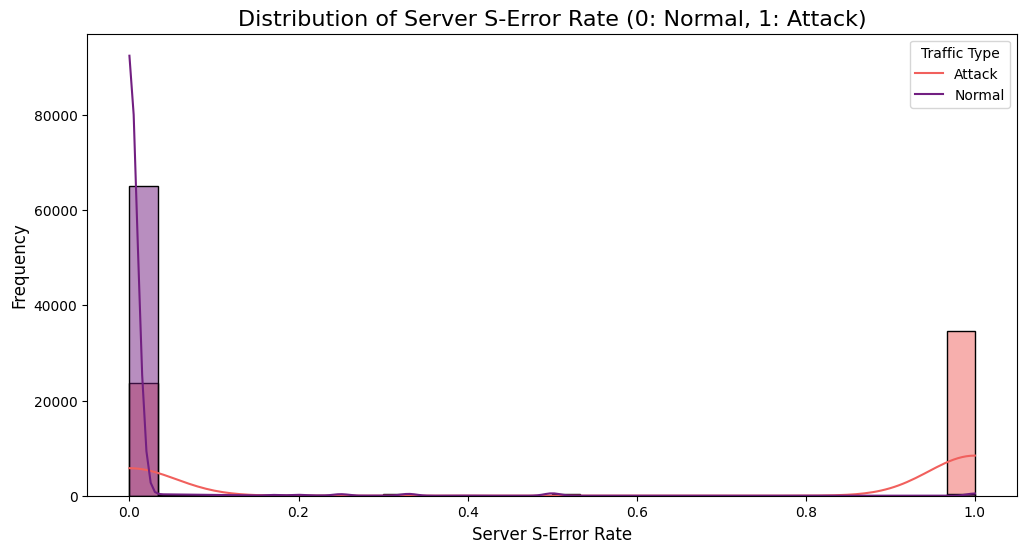

In [ ]:
# Histogram for 'srv_serror_rate'
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='srv_serror_rate', hue='attack_binary', kde=True, bins=30, palette='magma')
plt.title('Distribution of Server S-Error Rate (0: Normal, 1: Attack)', fontsize=16)
plt.xlabel('Server S-Error Rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Traffic Type', labels=['Attack', 'Normal'])
plt.show()

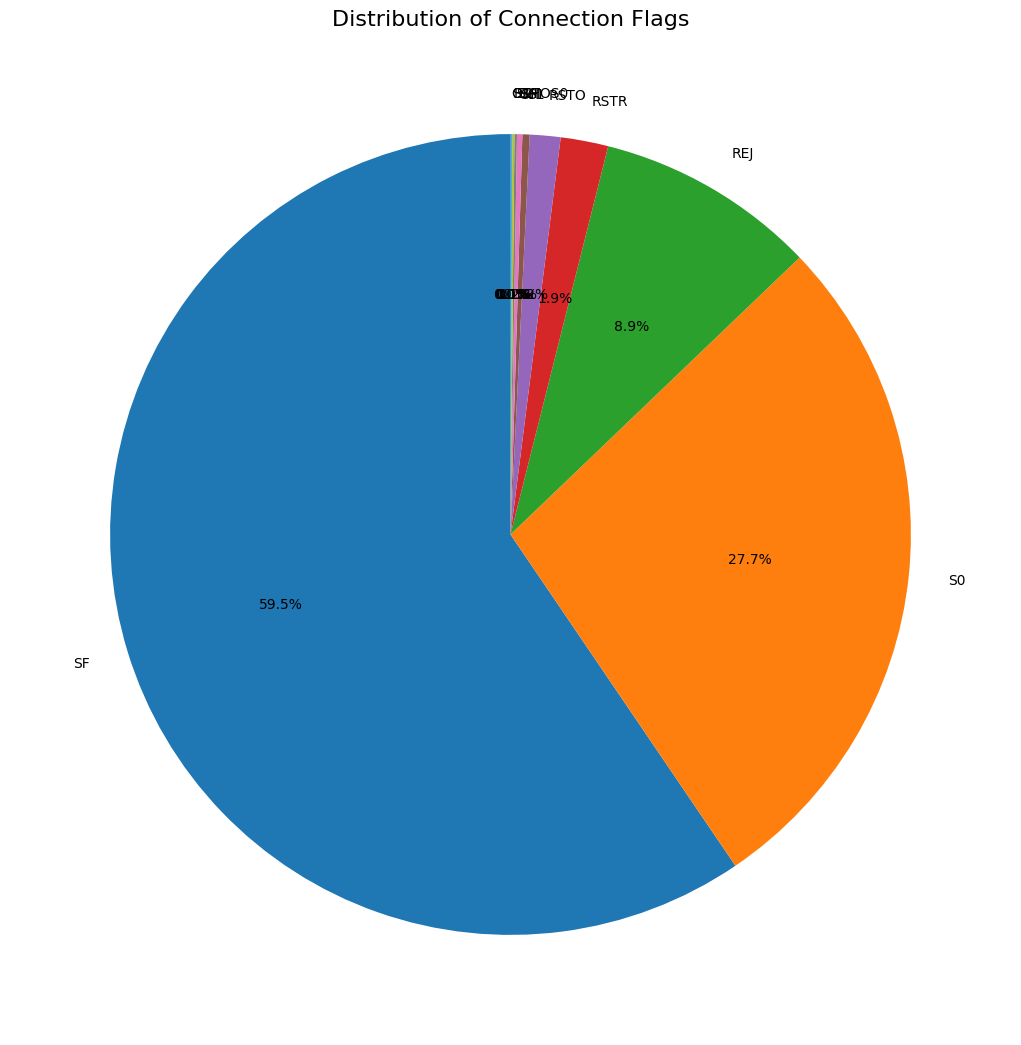

In [ ]:
# Pie chart for 'flag'
flag_counts = train_df['flag'].value_counts()

plt.figure(figsize=(20, 13))
plt.pie(
    flag_counts,
    labels=flag_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('tab10')
)
plt.title('Distribution of Connection Flags', fontsize=16)
plt.ylabel('')
plt.show()

/tmp/ipython-input-2164514893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='src_bytes', data=train_df, palette='Set2')


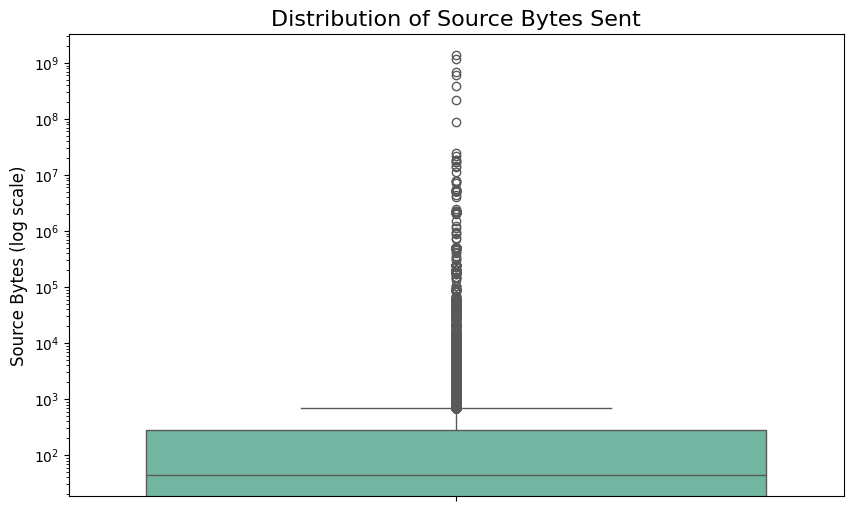

In [ ]:
# Box plot for 'src_bytes'
plt.figure(figsize=(10, 6))
sns.boxplot(y='src_bytes', data=train_df, palette='Set2')
plt.title('Distribution of Source Bytes Sent', fontsize=16)
plt.ylabel('Source Bytes (log scale)', fontsize=12)
plt.yscale('log')
plt.show()

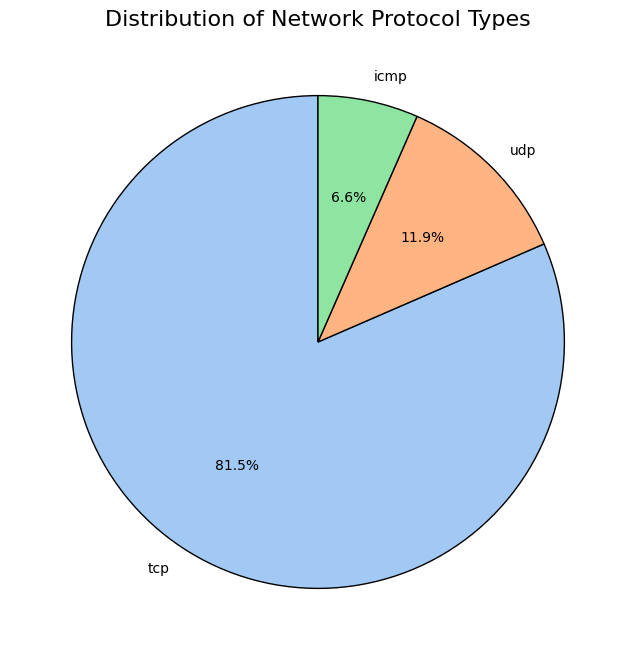

Percentage of Normal Traffic: 53.46%
Percentage of Abnormal (Attack) Traffic: 46.54%


In [ ]:
# Pie chart for 'protocol_type'
protocol_counts = train_df['protocol_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    protocol_counts,
    labels=protocol_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribution of Network Protocol Types', fontsize=16)
plt.ylabel('')
plt.show()

total_count = len(train_df)
normal_percentage = (train_df['attack_binary'].value_counts(normalize=True).get(0, 0)) * 100
attack_percentage = (train_df['attack_binary'].value_counts(normalize=True).get(1, 0)) * 100

print(f"Percentage of Normal Traffic: {normal_percentage:.2f}%")
print(f"Percentage of Abnormal (Attack) Traffic: {attack_percentage:.2f}%")

Error: 'your_dataset.csv' not found. Please provide a valid file path.
Using a sample DataFrame for demonstration.
--- Initial Data Inspection ---
First 5 rows of the DataFrame:
   Numeric_Column_1  Numeric_Column_2 Categorical_Column Text_Column
0         77.978685                 7                  B      text 0
1         70.255602                 4                  A      text 1
2         80.071029                 4                  B      text 2
3         85.790840                 7                  C      text 3
4         27.041903                 7                  C      text 4

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Numeric_Column_1    90 non-null     float64
 1   Numeric_Column_2    100 non-null    int64  
 2   Categorical_Column  95 non-null     object 
 3   Text_Column         100 non-null    ob

/tmp/ipython-input-1425603868.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-1425603868.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

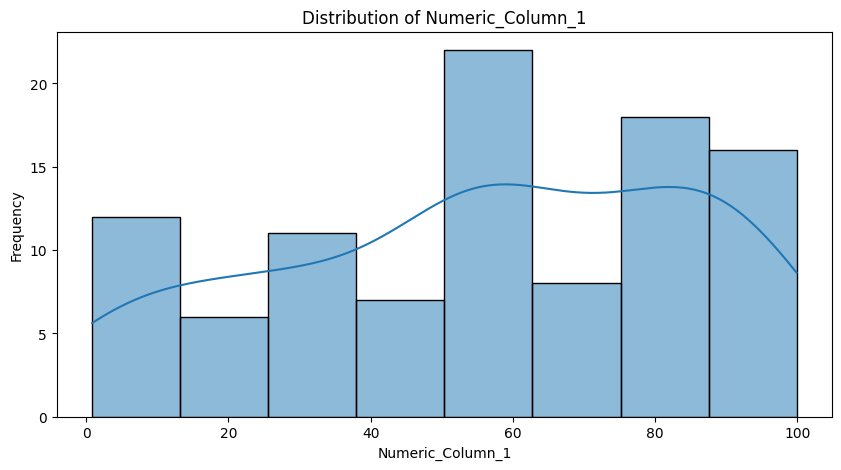

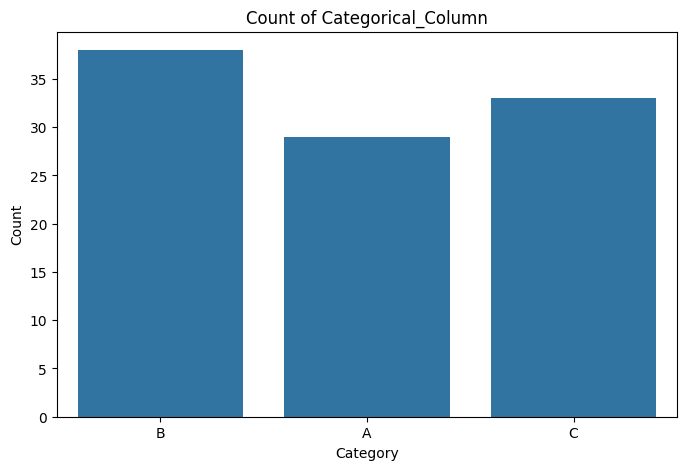

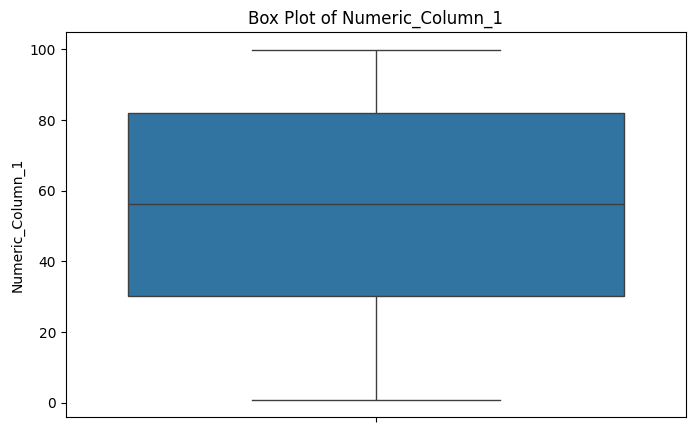

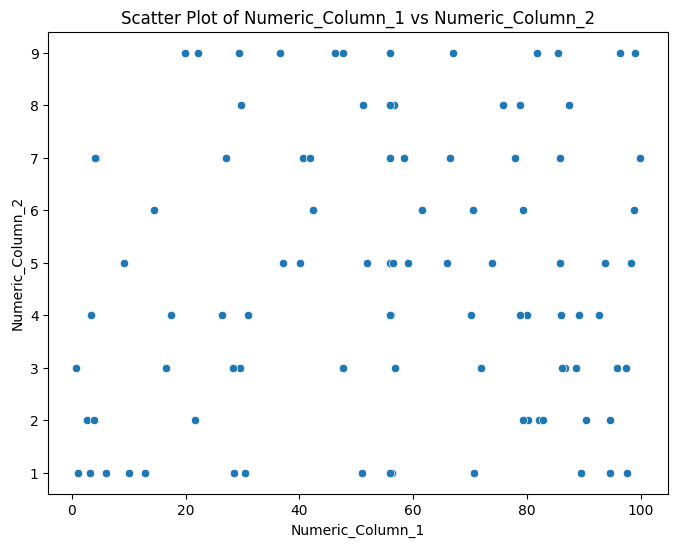

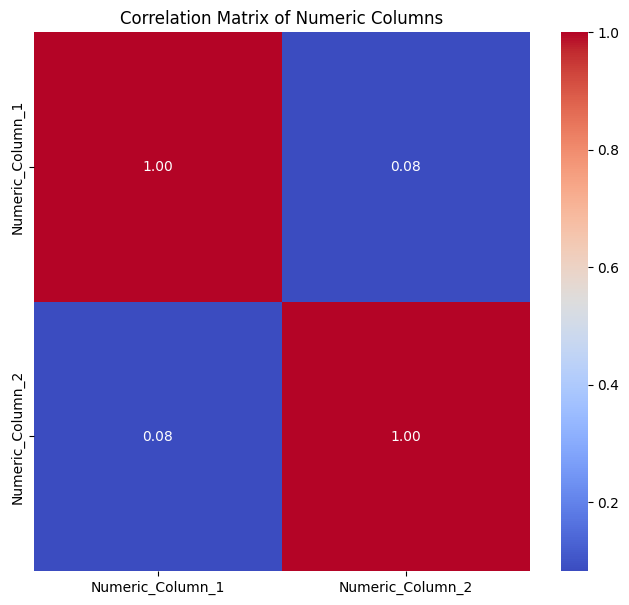

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('your_dataset.csv')
except FileNotFoundError:
    print("Error: 'your_dataset.csv' not found. Please provide a valid file path.")
    data = {
        'Numeric_Column_1': np.random.rand(100) * 100,
        'Numeric_Column_2': np.random.randint(1, 10, 100),
        'Categorical_Column': np.random.choice(['A', 'B', 'C'], 100),
        'Text_Column': ['text ' + str(i) for i in range(100)]
    }
    df = pd.DataFrame(data)
    df.loc[np.random.choice(df.index, 10), 'Numeric_Column_1'] = np.nan
    df.loc[np.random.choice(df.index, 5), 'Categorical_Column'] = np.nan
    print("Using a sample DataFrame for demonstration.")

print("--- Initial Data Inspection ---")
print("First 5 rows of the DataFrame:")
print(df.head())
print("\nDataFrame Info:")
df.info()
print("\nDescriptive Statistics:")
print(df.describe())
print("\nMissing values per column:")
print(df.isnull().sum())

for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    elif df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].mean(), inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

print("\n--- Data Visualization ---")
plt.figure(figsize=(10, 5))
sns.histplot(df['Numeric_Column_1'], kde=True)
plt.title('Distribution of Numeric_Column_1')
plt.xlabel('Numeric_Column_1')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Categorical_Column', data=df)
plt.title('Count of Categorical_Column')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(y='Numeric_Column_1', data=df)
plt.title('Box Plot of Numeric_Column_1')
plt.ylabel('Numeric_Column_1')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Numeric_Column_1', y='Numeric_Column_2', data=df)
plt.title('Scatter Plot of Numeric_Column_1 vs Numeric_Column_2')
plt.xlabel('Numeric_Column_1')
plt.ylabel('Numeric_Column_2')
plt.show()

numeric_df = df.select_dtypes(include=np.number)
if not numeric_df.empty:
    correlation_matrix = numeric_df.corr()
    plt.figure(figsize=(8, 7))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numeric Columns')
    plt.show()
else:
    print("\nNo numeric columns found for correlation analysis.")